In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('My Uber Drives - 2016.csv')
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
df.isna().sum().sum() #507 NaN

507

In [6]:
df['PURPOSE*'].nunique() #10 purposes

10

In [7]:
df['CATEGORY*'].nunique()

2

In [8]:
df['CATEGORY*'].unique()

array(['Business', 'Personal', nan], dtype=object)

In [9]:
bus = df['CATEGORY*'].value_counts()['Business']
bus

1078

In [10]:
pers = df['CATEGORY*'].value_counts()['Personal']
pers

77

Text(0.5, 1.0, 'CATEOGRY')

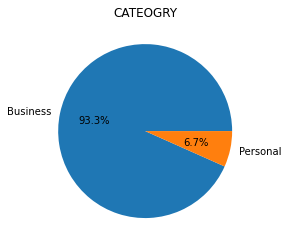

In [11]:
plt.pie([bus,pers], labels=['Business','Personal'], autopct='%1.1f%%')
plt.title('CATEOGRY')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


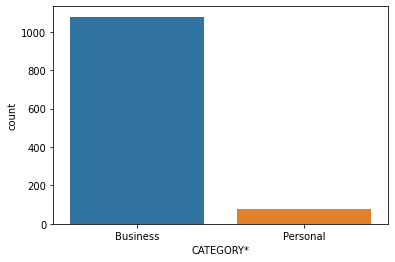

In [12]:
 sns.countplot(df['CATEGORY*'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


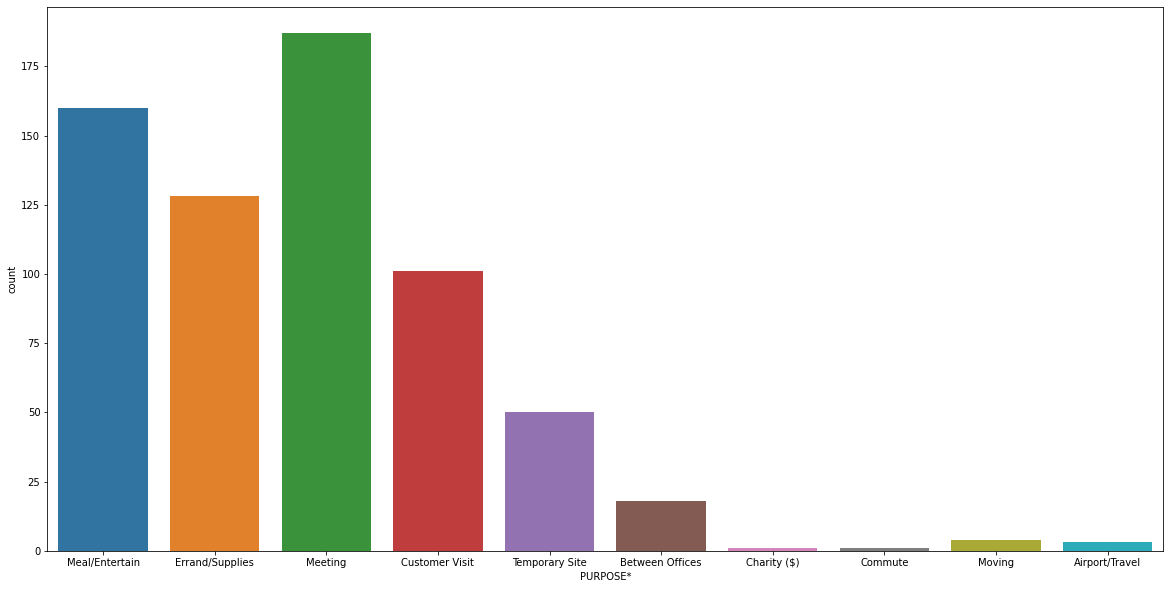

In [13]:
plt.figure(figsize=(20,10)) 
sns.countplot(df['PURPOSE*'])

In [14]:
df['START*'].nunique()

177

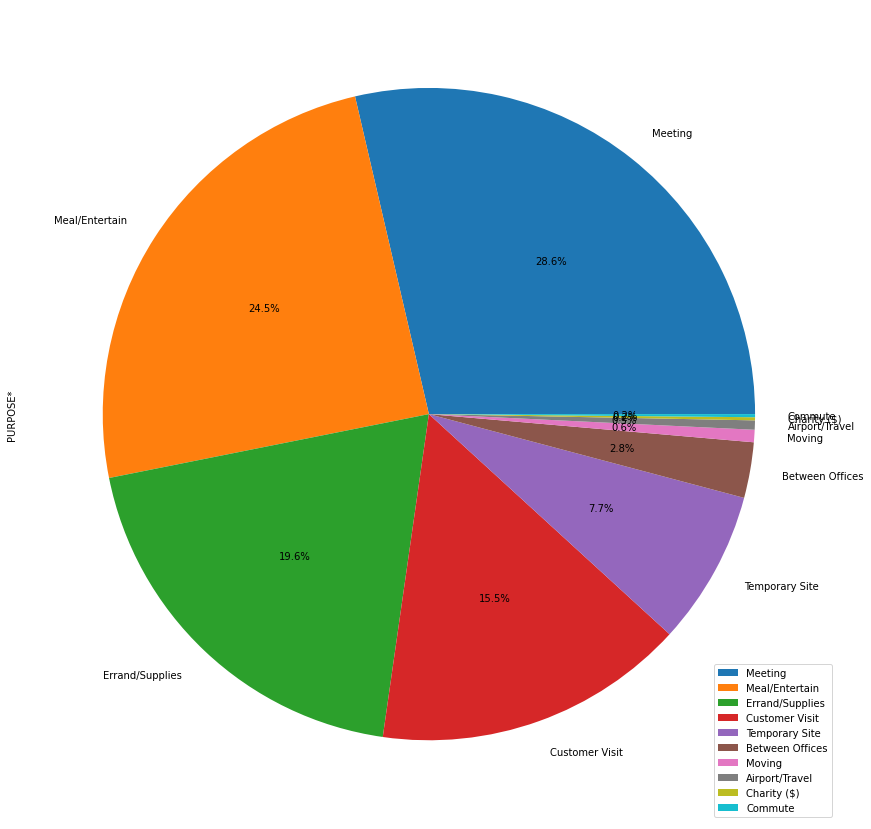

In [15]:

plt.figure(figsize = (15,15))
df['PURPOSE*'].value_counts().plot(kind ='pie', autopct='%1.1f%%', legend = True)


Text(0.5, 1.0, 'Months counts')

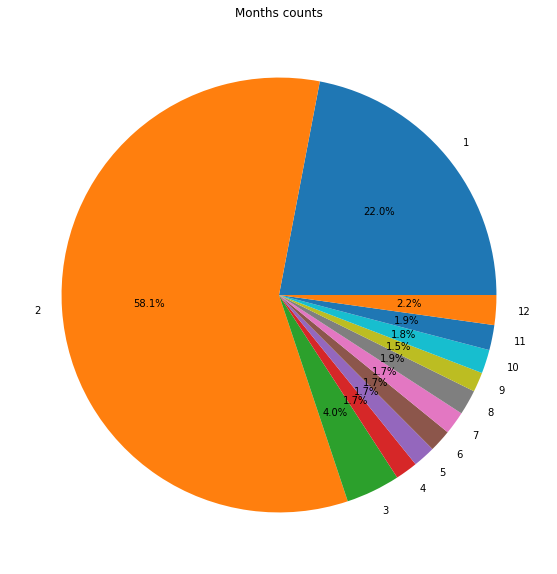

In [16]:
df['START_DATE*'].str.contains('/1').value_counts()[True]

month=[]

for i in range(1,13): #For loop to make a list containing number of rides in each months
  month_i = df['START_DATE*'].str.contains(f'/{i}').value_counts()[True]
  month.append(month_i)

plt.figure(figsize=(10,10))
plt.pie(month, labels=[1,2,3,4,5,6,7,8,9,10,11,12],autopct='%1.1f%%')
plt.title('Months counts') #Months 2 contains the most rides

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, '[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]')

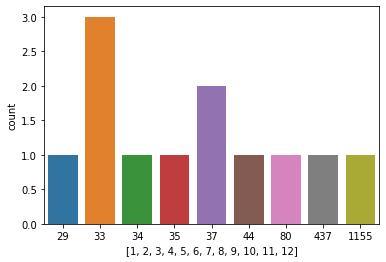

In [17]:
p = sns.countplot(month)
p.set_xlabel([1,2,3,4,5,6,7,8,9,10,11,12])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


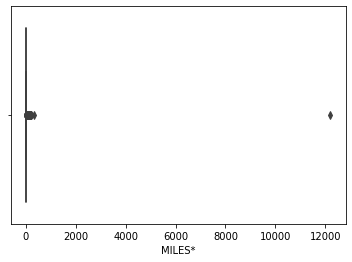

In [18]:
sns.boxplot(df['MILES*'])

In [22]:
#Make a loop to get number of drives in certain range of miles
five = 0
ten = 0
twenty = 0
thirty = 0
forty = 0
fifty = 0
m = 0
for i in df['MILES*']:
  if i<5:
    five+=1
    continue
  
  elif i>=5 and i<10:
    ten+=1
    continue
  
  elif i>=10 and i<20:
    twenty+=1
    continue

  elif i>=20 and i<30:
    thirty += 1
    continue

  elif i >= 30 and i < 40:
    forty += 1
    continue

  elif i >= 40 and i < 50 :
    fifty += 1
    continue

  elif i >= 50:
    m += 1
    continue

li= [five,ten,twenty,thirty,forty,fifty,m]
li


[496, 341, 234, 31, 13, 13, 28]

Text(0.5, 1.0, 'Miles count')

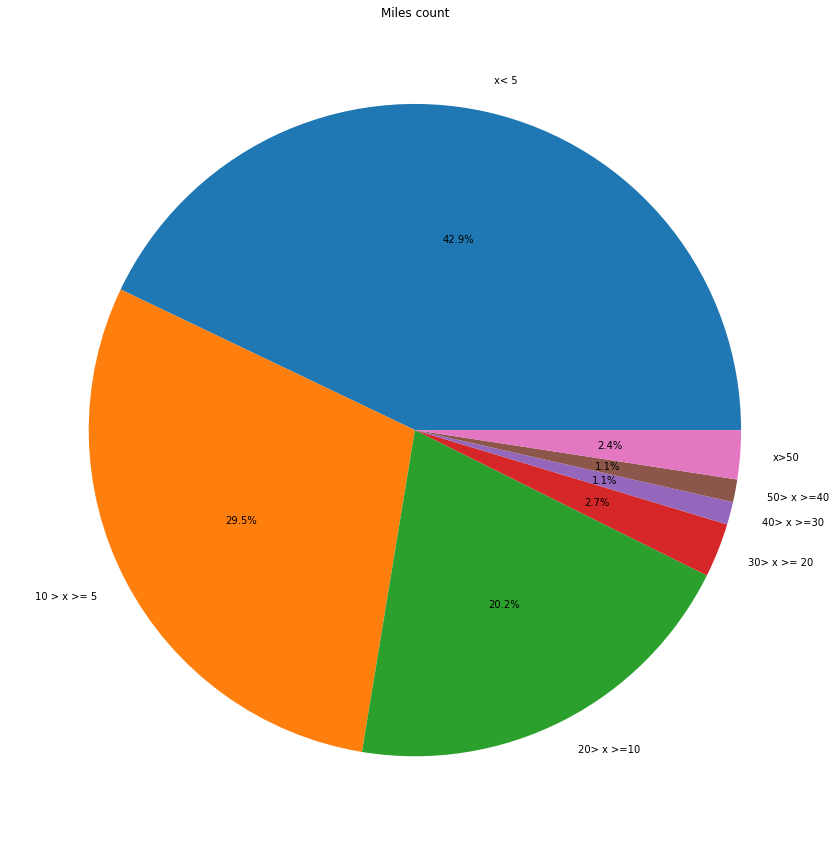

In [28]:
plt.figure(figsize=(15,15))
plt.pie(li, labels = ['x< 5' , '10 > x >= 5', '20> x >=10', '30> x >= 20', '40> x >=30', '50> x >=40', 'x>50'], autopct='%1.1f%%')
plt.title('Miles count') #Most the rides where less than 5 miles

In [30]:
df['START*'].value_counts().idxmax() # Most frequent start

'Cary'

In [32]:
df['STOP*'].value_counts().idxmax() #Most frequent stops

'Cary'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(1.0, 30.0)

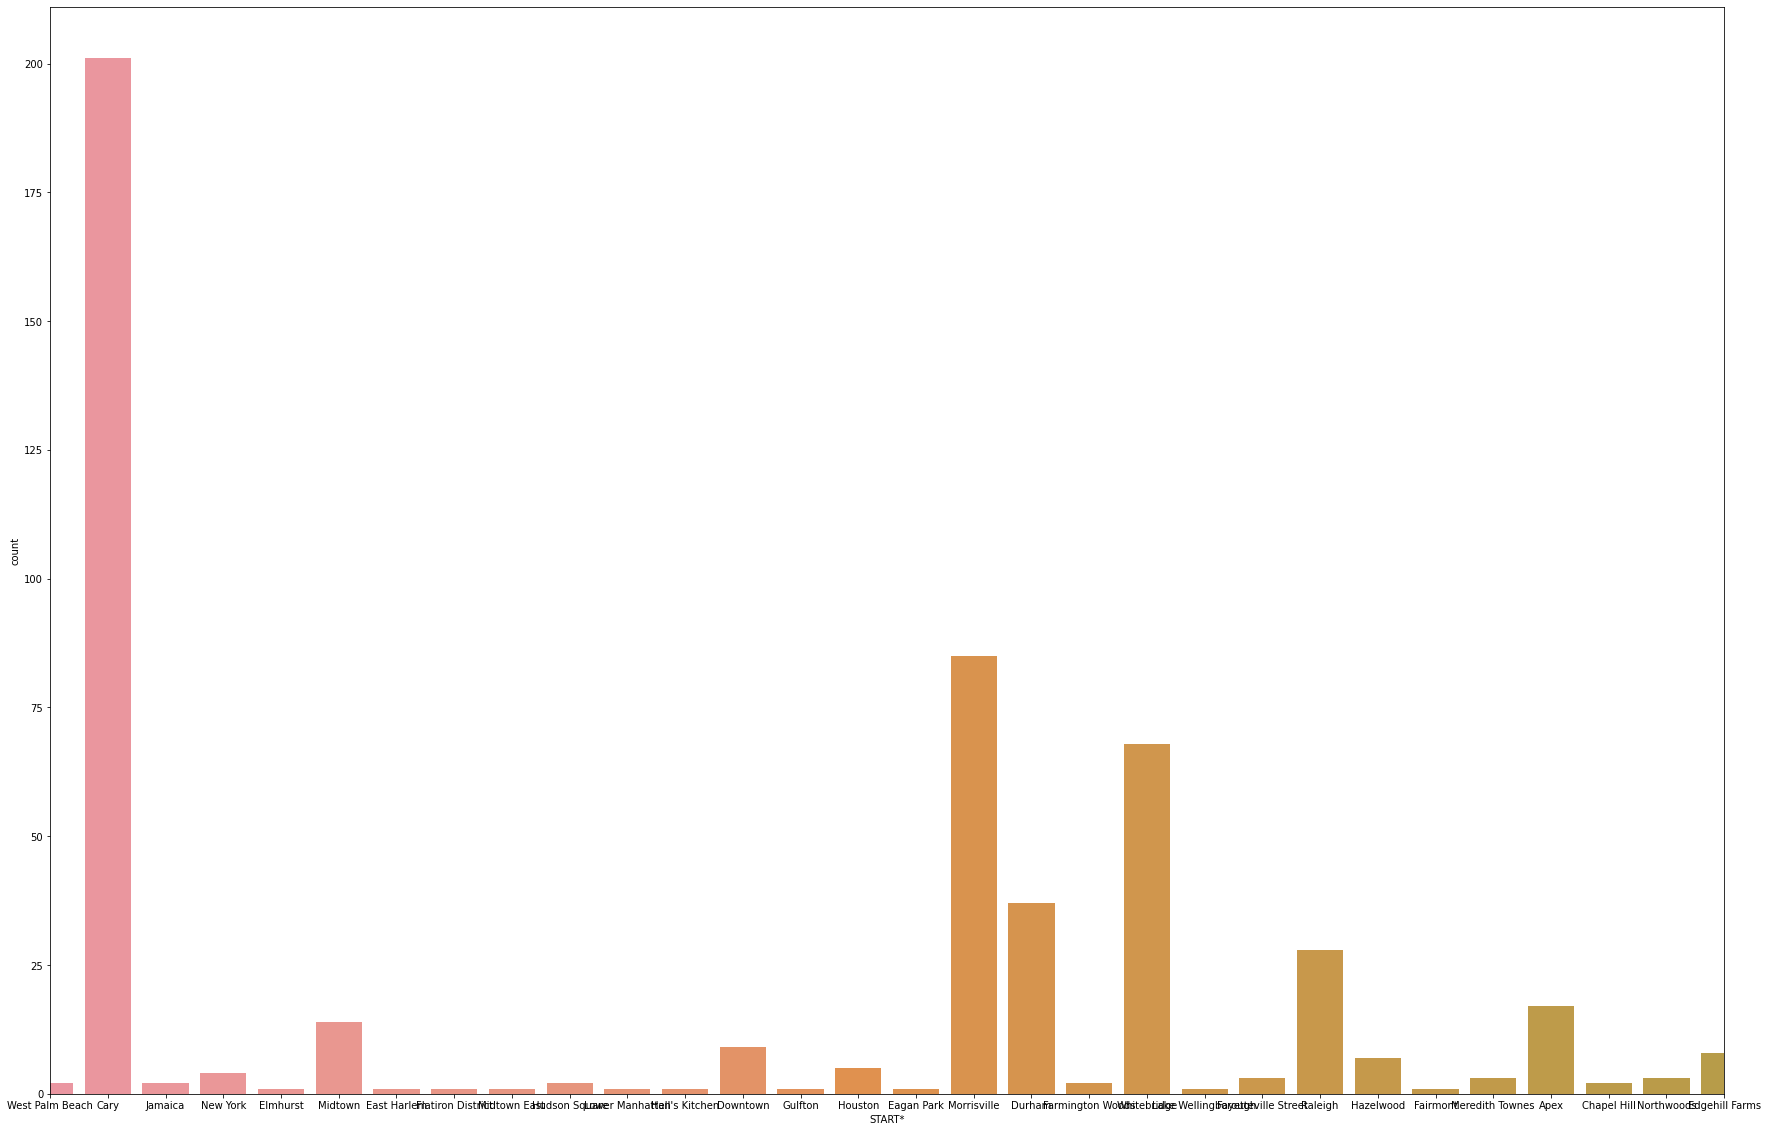

In [40]:
plt.figure(figsize=(30,20))
ax = sns.countplot(df['START*'])
ax.set_xlim(1,30)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(1.0, 30.0)

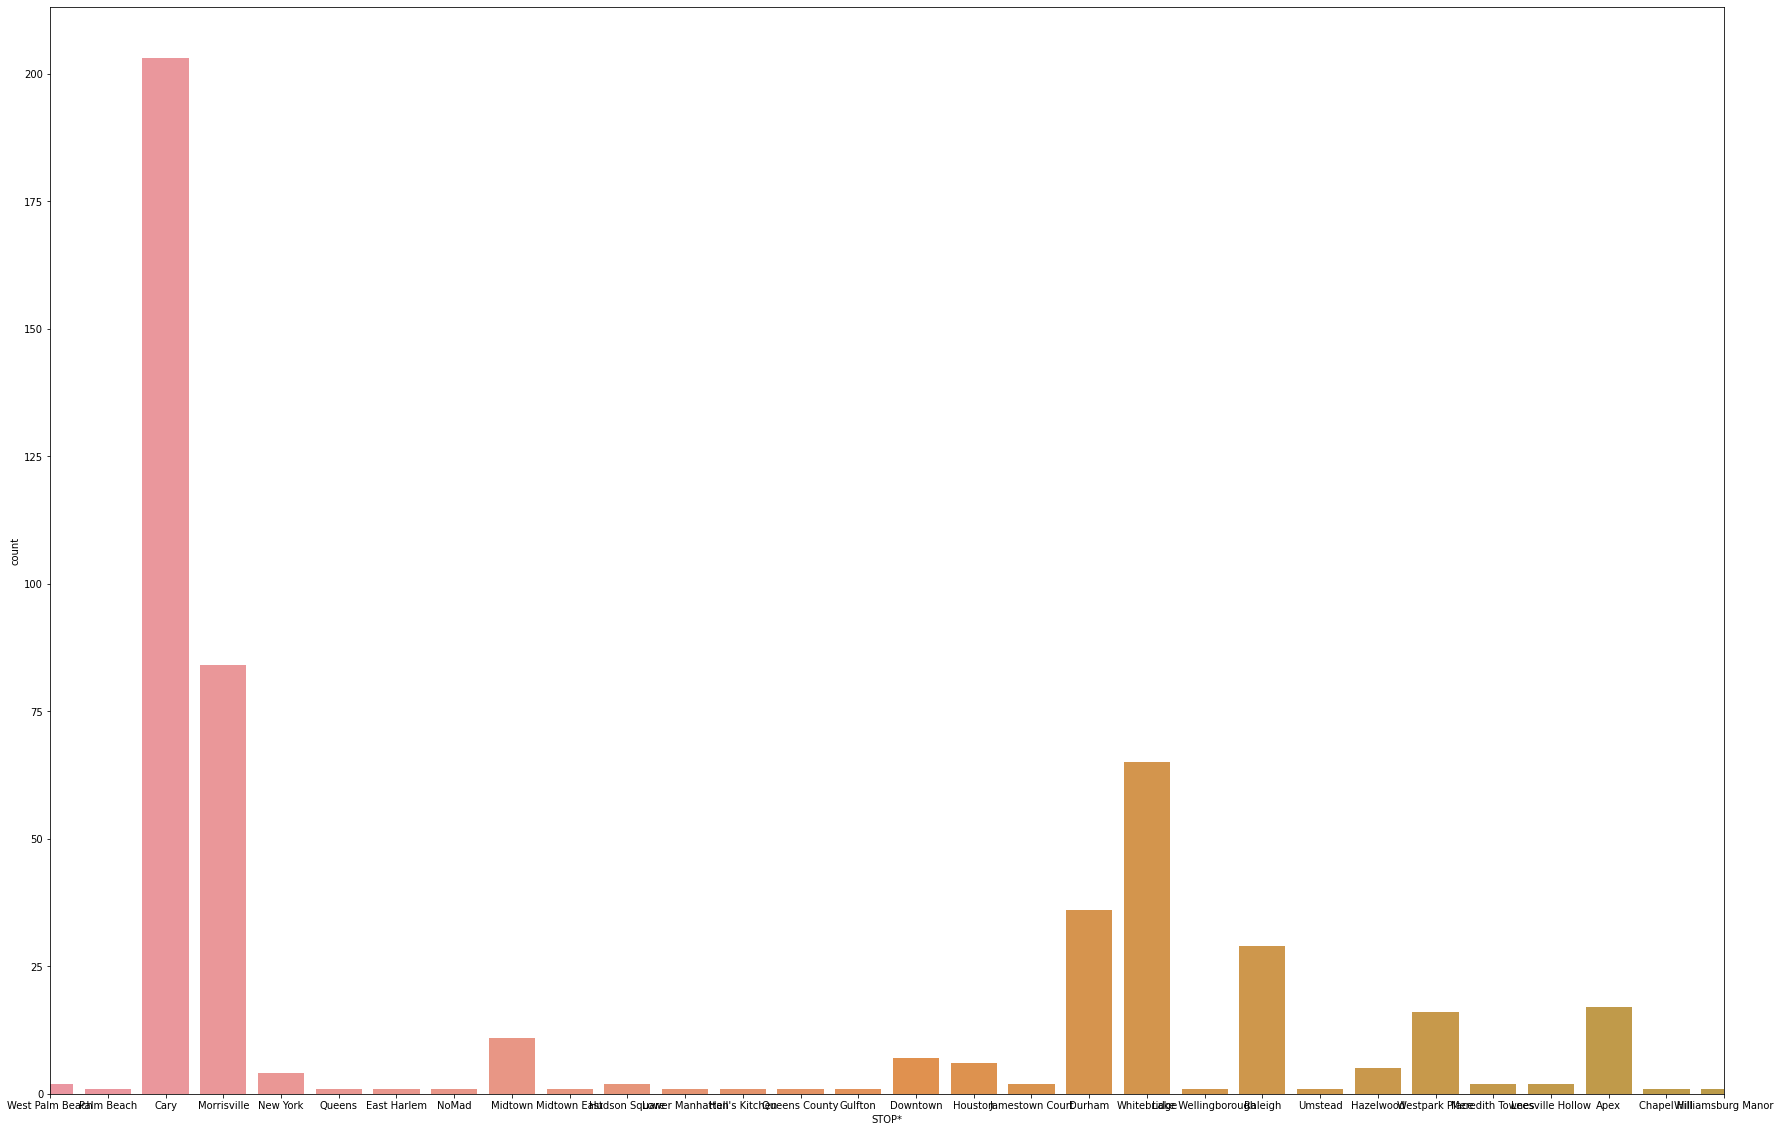

In [41]:
plt.figure(figsize=(30,20))
ax = sns.countplot(df['STOP*'])
ax.set_xlim(1,30)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function seaborn.rcmod.set>

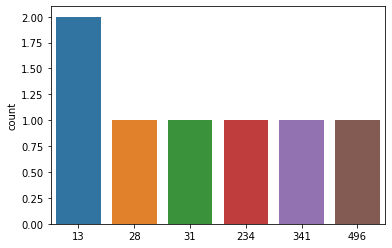

In [44]:
a = sns.countplot(li) #Barplot of miles per drives


In [ ]:
#From here we conclude the following
#Most trips where under 5 miles
#The category was mostly business
#Most starts where in Carry
#Most ends were also in Carry
#Most purposes were for meetings